## DANE WEJŚCIOWE - klasyfikacja ich


In [1]:
[
    'Blockiness',
    'SA',
    'Blockloss', 
    'Blur',
    'TA',
    'Exposure',
    'Contrast',
    'Noise',
    'Slice',
    'Flickering'
]

['Blockiness',
 'SA',
 'Blockloss',
 'Blur',
 'TA',
 'Exposure',
 'Contrast',
 'Noise',
 'Slice',
 'Flickering']

# na podstawie dwóch danych wejście i target stworzyć model, następnie zbudować decision tree, decision forest 
Zbudować tak program żeby generowało model np 10 tyś razy
i ocenić jaki jest precision - w sensie prawidłowość modelu.
Zaczytać csv do numpy, dostaniemy 2 klasy z pliku target

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
data_in = np.genfromtxt('all_DB_data.csv', delimiter=',')

In [3]:
target = np.genfromtxt('all_DB_target.csv', delimiter=',')


In [4]:
clf = DecisionTreeClassifier()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data_in, target, test_size=0.3)

In [6]:
clf.fit(X_train,Y_train)
print (clf.feature_importances_)

[0.         0.02156477 0.11675485 0.         0.04883451 0.
 0.05775575 0.5818409  0.01232273 0.16092649]


In [7]:
print(clf.score(X_test, Y_test))

0.926829268292683


In [10]:
clf = DecisionTreeClassifier()
sample_table_tree = []
data_tree = []
score_tree = []
for sample_id in range (100):
    sample_table_tree.append(clf.fit(X_train,Y_train).feature_importances_)
    score_tree.append(clf.fit(X_train,Y_train).score(X_test, Y_test))
    data_tree.append(clf.fit(X_train,Y_train).predict_proba(X_test))
    

In [9]:
clf_forest = RandomForestClassifier()
sample_table = []
data = []
score = []
for sample_id in range (100):
    sample_table.append(clf_forest.fit(X_train,Y_train).feature_importances_)
    score.append(clf_forest.fit(X_train,Y_train).score(X_test, Y_test))
    data.append(clf_forest.fit(X_train,Y_train).predict_proba(X_test))

In [11]:
data_tree= pd.DataFrame(score_tree )
data_f = pd.DataFrame(score )


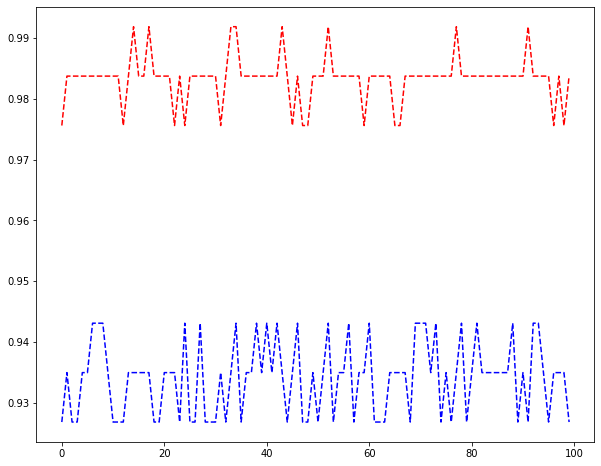

In [12]:
plt.figure(figsize=(10,8), num=200)
plt.plot(data_f,'r--',data_tree,'b--')



In [15]:
autput = pd.concat([data_f, DF_30_FOREST], axis=1)

In [14]:
DF_30_FOREST = pd.DataFrame(sample_table_tree)

In [16]:
DF_30_FOREST.to_csv('DF_30_forest.csv')
autput.to_csv('all.csv')


In [19]:
data_f.max()

0    0.99187
dtype: float64

In [21]:
DF_30_FOREST.head() # serializacja obiektu do pliku i później można to wykorzystać do działania. import pickle - moduł do zapisu obiektu do pliku n

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.012323,0.116755,0.048835,0.000000,0.0,0.079321,0.581841,0.000000,0.160926
1,0.0,0.061157,0.116755,0.000000,0.021565,0.0,0.057756,0.581841,0.000000,0.160926
2,0.0,0.012323,0.116755,0.021565,0.000000,0.0,0.057756,0.581841,0.048835,0.160926
3,0.0,0.048835,0.129078,0.000000,0.000000,0.0,0.079321,0.581841,0.000000,0.160926
4,0.0,0.000000,0.116755,0.048835,0.000000,0.0,0.079321,0.581841,0.000000,0.173249


####     with open(f'{NAME}', 'wb') as f2:

####        pickle.dump(points, f2)

In [25]:
from sklearn.metrics import precision_recall_fscore_support

In [26]:
precision_recall_fscore_support(Y_test, clf.predict(X_test), average='binary')

(0.9444444444444444, 0.9807692307692307, 0.9622641509433962, None)

In [29]:
from sklearn import tree

In [33]:
text_representation = tree.export_text(clf, feature_names=[
    'Blockiness',
    'SA',
    'Blockloss', 
    'Blur',
    'TA',
    'Exposure',
    'Contrast',
    'Noise',
    'Slice',
    'Flickering'
]
                                      )
                                       

In [34]:
print(text_representation) # wyrysowanie drzewa decyzyjnego

|--- Noise <= 0.13
|   |--- Slice <= 0.04
|   |   |--- class: 0.0
|   |--- Slice >  0.04
|   |   |--- class: 1.0
|--- Noise >  0.13
|   |--- Flickering <= 0.34
|   |   |--- Blockloss <= 0.05
|   |   |   |--- SA <= 0.74
|   |   |   |   |--- class: 1.0
|   |   |   |--- SA >  0.74
|   |   |   |   |--- class: 0.0
|   |   |--- Blockloss >  0.05
|   |   |   |--- Contrast <= 0.32
|   |   |   |   |--- class: 1.0
|   |   |   |--- Contrast >  0.32
|   |   |   |   |--- class: 0.0
|   |--- Flickering >  0.34
|   |   |--- Contrast <= 0.58
|   |   |   |--- class: 1.0
|   |   |--- Contrast >  0.58
|   |   |   |--- Blockloss <= 0.09
|   |   |   |   |--- class: 1.0
|   |   |   |--- Blockloss >  0.09
|   |   |   |   |--- class: 0.0



In [37]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [41]:
from dtreeviz.trees import dtreeviz # wyrysowanie drzewa decyzyjnego w sposób graficzny

In [42]:
viz = dtreeviz(
    clf,
    X_test,
    Y_test,
    target_name="target",
    feature_names=[
        'Blockiness',
        'SA',
        'Blockloss',
        'Blur',
        'TA',
        'Exposure',
        'Contrast',
        'Noise',
        'Slice',
        'Flickering'
    ],
    class_names=['PGC', 'UGC']
)

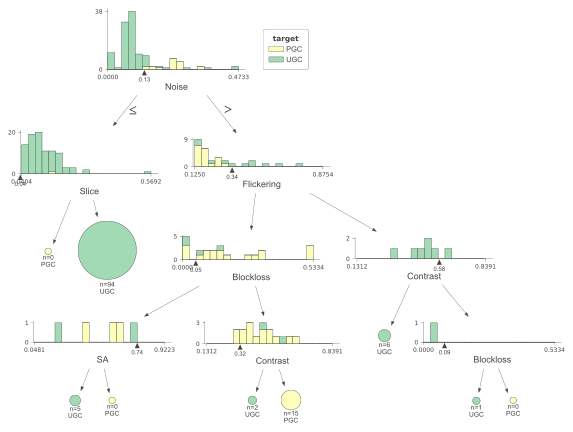

In [43]:
viz

In [44]:
viz.save("decision_tree.svg")